# Números Aleatórios

Dizemos que uma sequência de observações é aleatória quando ela não apresenta nenhum regularidade ou padrão aparente.

"randomness is in the eye of the beholder" (Numerical Recipes)[http://numerical.recipes/]

"Anyone who attempts to generate random numbers by deterministic means is, of course, living in a state of sin". (John von Neumann)


![dilbert](imgs/dilbert-random.png)


Existem três fontes de aleatoriedade:
1. aleatoriedade do ambiente
2. aleatoriedade nas condições iniciais
3. geração intrı́nseca de aleatoriedade

"assuming that there is a random external environment which continually affects the system one is looking at, and continually injects randomness into it."
(...)
"the basic mechanisms responsible for phenomena that we see in nature are somehow the same as those responsible for phenomena that we see in simple programs".
(...)
"simple programs can produce apparently random behavior even when they are given no random input whatsoever".
(Stephen Wolfram, A New Kind of Science)

![wolfram 299](imgs/nkspg299.png)


![wolfram 27](imgs/nkspg27.png)

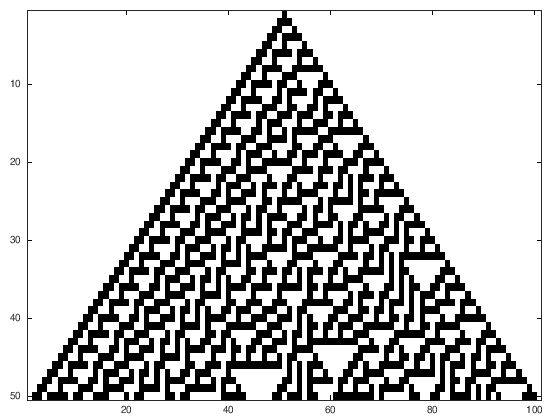

In [6]:
function y = rule30(x)
  y = zeros(size(x));
  for i = 2 : length(x)-1,
     if     x(i-1) == 1 && x(i) == 1 && x(i+1) == 1,
        y(i) = 0;
     elseif x(i-1) == 1 && x(i) == 1 && x(i+1) == 0,
        y(i) = 0;
     elseif x(i-1) == 1 && x(i) == 0 && x(i+1) == 1,
        y(i) = 0;
     elseif x(i-1) == 1 && x(i) == 0 && x(i+1) == 0,
        y(i) = 1;
     elseif x(i-1) == 0 && x(i) == 1 && x(i+1) == 1,
        y(i) = 1;
     elseif x(i-1) == 0 && x(i) == 1 && x(i+1) == 0,
        y(i) = 1;
     elseif x(i-1) == 0 && x(i) == 0 && x(i+1) == 1,
        y(i) = 1;
     elseif x(i-1) == 0 && x(i) == 0 && x(i+1) == 0,
        y(i) = 0;
     endif
  endfor
endfunction


x = [zeros(1,50), 1, zeros(1,50)];
X = x;
for i = 2 : 50,
   X(i,:) = rule30(X(i-1,:));
endfor

imagesc(X); cmap=colormap('gray'); colormap(1-cmap);

"I believe that this mechanism [intrinsic randomness] is in fact ultimately responsible for a large fraction, if not essentially all, of the randomness that we see in the natural world. (...) to get randomness in a particular system it turns out that there is no need for continual interaction between the system and an external random environment". (Stephen Wolfram, A New Kind of Science)


### Números aleatórios gerados computacionalmente

O seguinte método é utilizado desde o final dos anos 1940 em diversos sistemas computacionais:

"if one successively multiplies a number by various constant factors, and then looks at the digit sequences of the numbers that result (...) the patterns of digits obtained in this way seem quite random. (...) For practical reasons, such generators typically keep only, say, the rightmost 31 digits in the numbers at each step." (Stephen Wolfram, A New Kind of Science)


![](imgs/nkspg319.png)
![](imgs/nkspg320a.png)
![](imgs/nkspg320b.png)
![](imgs/nkspg320c.png)

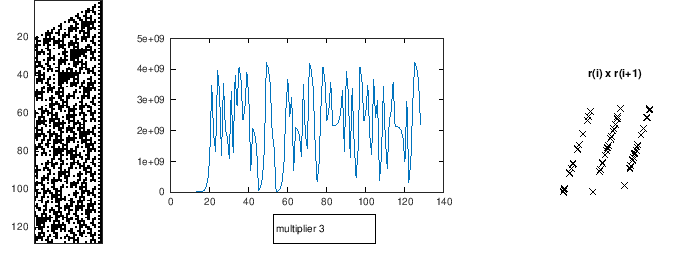

In [48]:
function r = randomnumber(n,p)
% r = randomnumber(n,p)
% creates a vector of n random numbers using p as multiplying factor (default = 65539)
  if nargin < 2, p = 65539; endif
  r = 1;
  for i = 2 : n,
    r(i) = mod(p * r(i-1),2^32);
  endfor
endfunction

function I = rndnum2matrix(r)
  for i = 1 : length(r),
     nb = dec2bin(r(i),32);
     I(i,:) = str2num(regexprep(nb(end-31:end),'(.)',' $0'));
  endfor
endfunction

p = 3;
r = randomnumber(128,p);
I = rndnum2matrix(r);

f = figure("position",get(0,"screensize")./[1 1 2 3]);
subplot('position',  [0.05, 0.05, 0.1, 1]);
imagesc(I); colormap(1 - colormap('gray')); axis ("ticy");
subplot('position',  [0.25, 0.25, 0.4, 0.6]);
plot(r);
annotation('textbox',[0.4 0.05 0.1 0.1],'string',sprintf(' multiplier %d',p));
subplot('position',  [0.7, 0.25, 0.4, 0.4]);
plot(r(1:2:end),r(2:2:end),'kx'); axis ("off","square"); title('r(i) x r(i+1)');

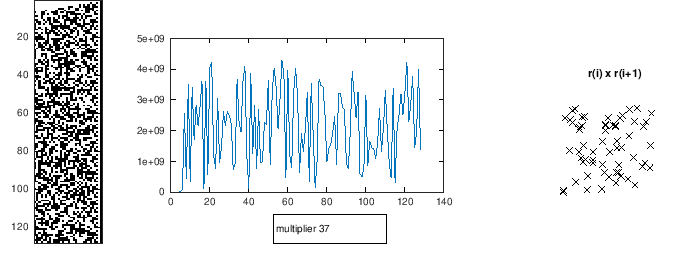

In [47]:
p = 37;
r = randomnumber(128,p);
I = rndnum2matrix(r);

f = figure("position",get(0,"screensize")./[1 1 2 3]);
subplot('position',  [0.05, 0.05, 0.1, 1]);
imagesc(I); colormap(1 - colormap('gray')); axis ("ticy");
subplot('position',  [0.25, 0.25, 0.4, 0.6]);
plot(r);
annotation('textbox',[0.4 0.05 0.1 0.1],'string',sprintf(' multiplier %d',p));
subplot('position',  [0.7, 0.25, 0.4, 0.4]);
plot(r(1:2:end),r(2:2:end),'kx'); axis ("off","square"); title('r(i) x r(i+1)');

## Gerador de número aleatório Lehmer

$X_{k+1} = g \cdot X_k \mod n$

onde $n$ é um número primo ou uma potência de um número primo, o multiplicador $g$ é uma raiz primitiva módulo $n$ e a semente $X_0$ é co-primo com $n$.

https://en.wikipedia.org/wiki/Lehmer_random_number_generator

## Mersenne Twister

A função rand do Octave rand utiliza o *Mersenne Twister* com um período de $2^{19937}-1$. Ela não deve ser utilizada para criptografica sem realizar o hash seguro de diversos valores juntos, caso contrário o estado do gerador pode ser determinado após 624 valores consecutivos.

O gerador de número aleatório usando o método *Mersenne Twister* irá utilizar um primo de Mersenne (um número primo que é um a menos que uma potência de dois: $2^p-1$, onde $p$ é um primo). No artigo original, Lehmer sugeriu a forma algébrica de f(.) e também sugeriu que o primo de Mersenne $m = 2^{31} - 1$ seria uma escolha apropriada para o módulo (sua sugestão foi ignorada para obter um cálculo computacional mais rápido, sendo utilizado $m = 2^b$, onde $b$ é o inteiro com tamanho de palavra no computador).

Escolhendo os parâmetros $a = 16807$ e $m = 2^{31} - 1$ define-se um gerador com período completo que é demonstradamente aleatório e pode ser implementado corretamente em quase qualquer sistema.

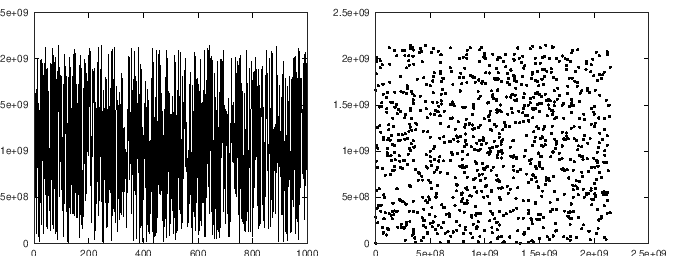

In [51]:
function r = rndmt(n,a,m)
% r = rndmt(n,a,m)
% Mersenne Twister random number generator

  if nargin < 3, m = 2^31 - 1; endif
  if nargin < 2, a = 16807; endif
  
  r = uint64(1);
  for i=2:n,
    r(i) = mod(a * r(i-1), m);
  endfor
endfunction


r = rndmt(1E3);
figure("position",get(0,"screensize")./[1 1 2 3]) 
subplot('position',  [0.05, 0.05, 0.4, 0.9]);
plot(r,'k-');
subplot('position',  [0.55, 0.05, 0.4, 0.9]); 
plot(r(1:end-1),r(2:end),'.k');

## Números aleatórios em Linux

No Linux existem a variável RANDOM que pode ser utilizada para gerar números aleatórios entre 0 e 32.767 (15 bits).

In [52]:
echo $RANDOM

23519


A semente é inicializada no boot. Mas pode ser inicializada manualmente. Abaixo vemos um exemplo de como inicializá-la utilizando o ID do processo corrente.

In [54]:
RANDOM=$$ ; for i in {1..5}; do echo $RANDOM; done

30418
23672
1830
22145
12552


Podemos também inicializá-la com o número de segundos desde o início da Era Unix (1 de janeiro de 1970).

In [55]:
RANDOM=`date +%s`; for i in {1..5}; do echo $RANDOM; done

19197
23408
19146
20534
3166


O Linux possui duas fontes de números aleatórios mais confiáveis:

* /dev/urandom  (unlimited)
* /dev/random

Eles utilizam ruído ambiente coletado de dispositivos e outros recursos do sistema que são armazenados em um "piscina de entropia".

In [56]:
stat /dev/urandom

  File: /dev/urandom
  Size: 0         	Blocks: 0          IO Block: 4096   character special file
Device: 6h/6d	Inode: 11          Links: 1     Device type: 1,9
Access: (0666/crw-rw-rw-)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2019-08-18 18:29:43.719999643 -0300
Modify: 2019-08-18 18:29:43.719999643 -0300
Change: 2019-08-18 18:29:43.719999643 -0300
 Birth: -


Podemos verificar quanta entropia temos disponível na "piscina". O número abaixo representa quantos bits de entropia foram coletados.

In [57]:
cat /proc/sys/kernel/random/entropy_avail

3840


Podemos utilziar umas dessas duas fontes para gerar, por exemplo, um arquivo de 1 M aleatório.

In [58]:
head -c 1M < /dev/urandom > /tmp/randomfile

Podemos também utilizá-los para gerar números aleatórios.

In [59]:
od -vAn -N4 -tu < /dev/urandom
    # -tu : -t, --format=TYPE
    #        u unsigned decimal, SIZE bytes per integer
    # -N, --read-bytes=BYTES
    #     -N4 reads 4 bytes

 2918179816


Podemos gerar uma sequência interminável de números aleatórios. No exemplo abaixo utilizamos o *head* para liminar a exibição.

In [ ]:
od -vAn -tu < /dev/urandom | head | tr ' ' '\n' | sed '/^$/d'

1561942558
1503495937
2993509805
4105025862
3586605765
842261642
2263610278
2975888784
3440088632
4238618744
4041564822
4047453779
3577907992
846649523
1899341083
1176975026
1226037125
1523526477
12339388
807667086
4185036332
2593577837
1905655525
2520875612
23422755
1835415378
500312904
3682308049
4106997934
1942328865
3412356797
50109931
2374618575
3333325405
1935050945
3172827300
1630466194
2107911798
417177524
3143339526


Quando vamos gerando número aleatório, vamos esvaziando a piscina de entropia. Eventualmente, em algum momento não será mais possível gerar números aleatórios utilizando o */dev/random* sem gerar mais entropia para encher a piscina.

Para gerar um número de 10 dígitos aleatórios, podemos fazer o seguinte:

In [6]:
cat /dev/urandom | tr -dc '0-9' | fold -w 10 | head -n 1

1888988024


Keyboard Interrupt


E para gerar um string aleatória podemos fazer:

In [ ]:
cat /dev/urandom | tr -dc 'a-zA-Z0-9' | fold -w ${1:-32} | head -n 1

4wsipcGuwbZhtvLPfDXDM6qRrULix0gD
